# Bitcoin Price Prediction using Twitter Sentimennt Analysis


### Text mining Project (Semester 4)




# Nom: Boujbair Oussamae
## Data INE2





# Install vaderSentiment

In [1]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis 
#tool that is specifically attuned to sentiments expressed in social media
! pip install vaderSentiment

# Import the librairies

In [2]:
from time import sleep
import os

#JSON is a syntax for storing and exchanging data
import json

#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import pandas as pd

#io module provides Python’s main facilities for dealing with various types of I/O
import io

#A regular expression (or RE) specifies a set of strings that matches it
import re

#NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, 
#Fourier transforms, and more
import numpy as np

#Instantly make your loops show a smart progress meter
from tqdm import tqdm

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Import Datasets

In [3]:
tweets_raw_file   = 'Bitcoin_tweets.csv'
tweets_clean_file = 'Bitcoin_tweets_clean.csv'
bitcoin_price_file = 'BTC-USD.csv'

In [4]:
df_raw = pd.read_csv(tweets_raw_file,lineterminator='\n',low_memory=False)

# Visualize the data 

In [5]:
print(df_raw.shape)
df_raw.head(5)

(3318936, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


# Clean dataframe

In [6]:
# clean dataframe
#sort data by date
df_raw = df_raw.sort_values(by = 'date')

#add a column index
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    #Remove hashtags
    text = text.replace("#", "")
    #Remove Hyperlinks
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    #Remove Usernames and Replies
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
dd.to_csv(tweets_clean_file, header=True, encoding='utf-8',index=False)

100%|██████████| 33189/33189 [01:54<00:00, 288.86it/s]


In [7]:
df_clean = pd.read_csv(tweets_clean_file)

In [8]:
print(df_clean.shape)
df_clean.head(5)

(33189, 14)


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False
2,835342,Bitcoin,NaN,#bitcoin,2021-03-24 17:33:57,119.0,0.0,0.0,False,2021-08-06 04:03:53,"The current price of bitcoin is $40,149.00. It...","['bitcoin', 'btc', 'cryptocurrency']",Bitcoin Observer,False
3,1245465,Crypto Mentor,NOT FINANCIAL ADVICE,#Bitcoin (Free Crypto Signals🚀)\n14fsw2pR4u942...,2021-02-17 10:28:09,578.0,443.0,1957.0,False,2021-10-19 19:08:53,"Bitcoin going to $64,000 🚀",['Bitcoin'],Twitter for Android,False
4,2377391,AdamLiu,NaN,Crypto Asset Trend Professional Analyst，Early ...,2021-11-24 18:07:05,17714.0,53.0,840.0,False,2022-03-10 03:42:46,bitcoinnews 's short-term decline gives us a c...,"['bitcoinnews', 'BTC', 'BTCUSD', 'bitcon', 'Cr...",Twitter Web App,False


In [9]:
analyzer = SentimentIntensityAnalyzer()
# The compound column represents the sentiment of the tweets and its value is between -1 and 1
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(5)

100%|██████████| 33189/33189 [00:10<00:00, 3119.04it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False,-0.5067
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False,0.9215
2,835342,Bitcoin,NaN,#bitcoin,2021-03-24 17:33:57,119.0,0.0,0.0,False,2021-08-06 04:03:53,"The current price of bitcoin is $40,149.00. It...","['bitcoin', 'btc', 'cryptocurrency']",Bitcoin Observer,False,0.2732
3,1245465,Crypto Mentor,NOT FINANCIAL ADVICE,#Bitcoin (Free Crypto Signals🚀)\n14fsw2pR4u942...,2021-02-17 10:28:09,578.0,443.0,1957.0,False,2021-10-19 19:08:53,"Bitcoin going to $64,000 🚀",['Bitcoin'],Twitter for Android,False,0.0000
4,2377391,AdamLiu,NaN,Crypto Asset Trend Professional Analyst，Early ...,2021-11-24 18:07:05,17714.0,53.0,840.0,False,2022-03-10 03:42:46,bitcoinnews 's short-term decline gives us a c...,"['bitcoinnews', 'BTC', 'BTCUSD', 'bitcon', 'Cr...",Twitter Web App,False,0.5994


## Calculate a score for each tweet
To calculate the score for each tweet, we use different variables to which we had a weight based on its importance.

The compound column represents the sentiment of the tweets and its value is between -1 and 1.

We also use the number of retweets, the number of likes, and the number of users that follow the tweet's author.

In [10]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|██████████| 33189/33189 [00:02<00:00, 12412.96it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,2989762,Viktor Trokhymenko,NaN,I am from Ukraine interested in different dire...,2021-09-10 13:28:14,94.0,270.0,141.0,False,2022-04-19 18:36:25,"Check it out who followed to in Twitter!\n\n, ...","['BTC', 'crypto']",Twitter Web App,False,-0.5067,-71.194017
1,2441888,Crypto dog,NaN,"Market analysis & recaps, scalping leverage ca...",2021-12-20 06:16:13,139.0,221.0,53.0,False,2022-03-19 16:42:19,the strongest bullish signal flashed for Bitco...,"['Bitcoin', 'BTC', 'Cryptocurrency']",Twitter for Android,False,0.9215,49.405564


## Read Bitcoin price 

In [11]:
df_price = pd.read_csv(bitcoin_price_file)
df_price.Date = pd.to_datetime(df_price.Date)
df_price.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [12]:
crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [13]:
crypto_usd_grouped

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2022-01-24    36654.328125
2022-01-25    36954.003906
2022-01-26    36852.121094
2022-01-27    37138.234375
2022-01-28    36435.585938
Freq: D, Name: Close, Length: 2691, dtype: float64

# Part 2 NLP Modeling 

In [14]:
#Python library for processing textual data. It provides a simple API for diving into common 
#natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, 
#sentiment analysis, classification, translation, and more.
! pip install textblob 
from textblob import TextBlob

df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

,tweets
0,"Check it out who followed to in Twitter!\n\n, ..."
1,the strongest bullish signal flashed for Bitco...
2,"The current price of bitcoin is $40,149.00. It..."
3,"Bitcoin going to $64,000 🚀"
4,bitcoinnews 's short-term decline gives us a c...


In [15]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [17]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10


In [18]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#Polarity represents the degree of emotion expressed in the text.
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [19]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(crypto_price_cate)
    return res 

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [35]:
# may takes time 
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19,NaN,0.500000,0.50000,positive,False
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19,NaN,0.545833,0.20000,positive,False
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06,negative,0.233333,0.00000,neutral,False
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19,negative,0.000000,0.00000,neutral,False
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10,NaN,0.425000,0.15000,positive,False
...,...,...,...,...,...,...,...,...
33184,$ADA Update!!🚀\n\nCheckout the link in bio for...,ADA Update Checkout link bio crypto signal DOG...,2021-08-20,negative,0.000000,0.00000,neutral,False
33185,JacyEducation 10 - Spend more time reading (an...,JacyEducation Spend time reading learning repu...,2022-03-23,NaN,0.389286,0.15000,positive,False
33186,"Wonderful project, this project is very good a...",Wonderful project project good projector lot a...,2022-01-12,negative,0.505000,0.64000,positive,False
33187,Market environment is not ideal for momentum s...,Market environment ideal momentum swing tradin...,2022-02-14,NaN,0.693810,0.40381,positive,False


In [36]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()
df.to_csv('./df_data.csv')

## Model preparation 

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,"Check it out who followed to in Twitter!\n\n, ...",Check followed Twitter many Twitter Score sgm ...,2022-04-19,NaN,0.500000,0.50,positive,False
1,the strongest bullish signal flashed for Bitco...,strongest bullish signal flashed Bitcoin Not t...,2022-03-19,NaN,0.545833,0.20,positive,False
2,"The current price of bitcoin is $40,149.00. It...",The current price bitcoin It increased last ho...,2021-08-06,negative,0.233333,0.00,neutral,False
3,"Bitcoin going to $64,000 🚀",Bitcoin going,2021-10-19,negative,0.000000,0.00,neutral,False
4,bitcoinnews 's short-term decline gives us a c...,bitcoinnews short term decline give u chance l...,2022-03-10,NaN,0.425000,0.15,positive,False


In [24]:
X = df['cleaned_tweets']

#Convert categorical variable into dummy/indicator variables
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()


In [25]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26424,) (6606,) (26424, 3) (6606, 3)


In [26]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [27]:
X_train

[[4, 134, 337, 1479, 1],
 [580,
  1236,
  53,
  2,
  285,
  11,
  70,
  62,
  915,
  4076,
  2324,
  3593,
  2112,
  2170,
  11,
  70,
  62,
  1044,
  915,
  6355,
  389,
  3594,
  57,
  2170,
  190,
  311,
  65,
  2805,
  2943,
  170,
  384],
 [376, 445, 389, 2569, 10367, 1, 3241, 79, 1716],
 [4,
  1177,
  7180,
  59,
  916,
  4,
  1349,
  1992,
  59,
  709,
  1114,
  1,
  40,
  3242,
  1606,
  491,
  6,
  161,
  128,
  631,
  220,
  305,
  10368,
  710,
  38,
  128,
  5,
  3822,
  14959,
  2944],
 [262,
  133,
  288,
  59,
  178,
  119,
  1127,
  1115,
  5712,
  2945,
  711,
  22,
  632,
  283,
  59,
  14960,
  2,
  5,
  2,
  5,
  12,
  20,
  3,
  10,
  81,
  41,
  825,
  199,
  922,
  652,
  1680,
  3243,
  1948,
  6356,
  1784,
  2171,
  1900,
  3823,
  2493,
  4077,
  6357,
  8381,
  5177,
  3595,
  1480,
  2494],
 [7181, 8382, 5178, 1785, 1015, 34, 6358, 518, 1, 2, 14961, 737],
 [1717,
  300,
  14962,
  408,
  1425,
  71,
  125,
  9,
  643,
  8383,
  886,
  20,
  95,
  3244,
  25

In [38]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(26424, 30) (6606, 30)


In [29]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))#elle permet de remplacer les résultats négatifs par zéro.
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))#convertir un score en probabilité dans un contexte de classification multi-classe
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
207/207 - 21s - loss: 0.5546 - accuracy: 0.7760 - val_loss: 0.3657 - val_accuracy: 0.8709 - 21s/epoch - 102ms/step
Epoch 2/10
207/207 - 15s - loss: 0.2414 - accuracy: 0.9205 - val_loss: 0.2775 - val_accuracy: 0.9111 - 15s/epoch - 74ms/step
Epoch 3/10
207/207 - 15s - loss: 0.0999 - accuracy: 0.9687 - val_loss: 0.2420 - val_accuracy: 0.9305 - 15s/epoch - 74ms/step
Epoch 4/10
207/207 - 20s - loss: 0.0443 - accuracy: 0.9873 - val_loss: 0.2593 - val_accuracy: 0.9366 - 20s/epoch - 97ms/step
Epoch 5/10
207/207 - 15s - loss: 0.0236 - accuracy: 0.9942 - val_loss: 0.2842 - val_accuracy: 0.9357 - 15s/epoch - 73ms/step
Epoch 6/10
207/207 - 19s - loss: 0.0176 - accuracy: 0.9958 - val_loss: 0.2910 - val_accuracy: 0.9316 - 19s/epoch - 94ms/step
Epoch 7/10
207/207 - 18s - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.3259 - val_accuracy: 0.9346 - 18s/epoch - 86ms/step
Epoch 8/10
207/207 - 20s - loss: 0.0115 - accuracy: 0.9970 - val_loss: 0.3232 - val_accuracy: 0.9360 - 20s/epoch - 97ms/step

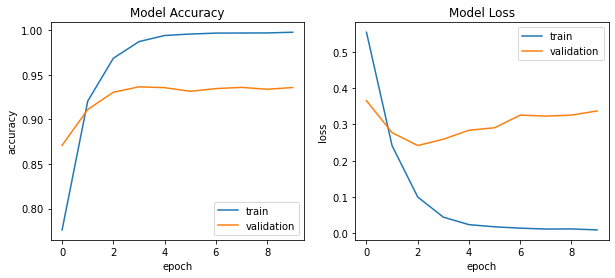

In [32]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

In [33]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

207/207 [==============================] - 2s 7ms/step
Accuracy:	93.6%
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       710
           1       0.95      0.95      0.95      2630
           2       0.93      0.97      0.95      3266

    accuracy                           0.94      6606
   macro avg       0.92      0.88      0.90      6606
weighted avg       0.93      0.94      0.93      6606



207/207 [==============================] - 1s 7ms/step
2    3266
1    2630
0     710
dtype: int64
2    3383
1    2633
0     590
dtype: int64


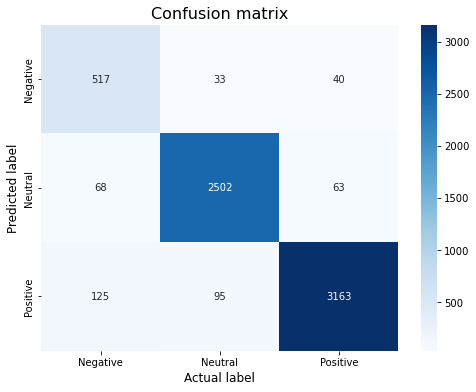

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

# FIN